In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('process_data/enriched_orders.csv')

In [2]:
# Check the basic info
data.info()

missing_values = data.isnull().sum()

summary_statistics = data.describe()

missing_values, summary_statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31572 entries, 0 to 31571
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_order              31572 non-null  int64  
 1   year_month            31572 non-null  object 
 2   order_total_paid      31572 non-null  float64
 3   product_name          31572 non-null  object 
 4   product_url_img       31572 non-null  object 
 5   image_matched_title   30472 non-null  object 
 6   image_matched_editor  30472 non-null  object 
 7   image_match_score     30472 non-null  float64
 8   text_matched_title    13573 non-null  object 
 9   text_matched_editor   13573 non-null  object 
 10  text_match_score      13573 non-null  float64
 11  final_title           31456 non-null  object 
 12  final_editor          31456 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.1+ MB


(id_order                    0
 year_month                  0
 order_total_paid            0
 product_name                0
 product_url_img             0
 image_matched_title      1100
 image_matched_editor     1100
 image_match_score        1100
 text_matched_title      17999
 text_matched_editor     17999
 text_match_score        17999
 final_title               116
 final_editor              116
 dtype: int64,
            id_order  order_total_paid  image_match_score  text_match_score
 count  3.157200e+04      31572.000000       30472.000000           13573.0
 mean   1.039798e+08          9.919889           0.975831               1.0
 std    7.158616e+06         10.069172           0.025762               0.0
 min    9.729752e+07          0.260000           0.937500               1.0
 25%    9.862927e+07          5.490000           0.937500               1.0
 50%    1.003791e+08          6.990000           0.968750               1.0
 75%    1.084011e+08         11.990000           1

In [3]:
covid_confinement_data = data[
    (data['year_month'] >= '2020-03') & (data['year_month'] <= '2020-05')
]

# Calculate total revenue and purchase count 
app_performance = covid_confinement_data.groupby('final_title').agg(
    total_revenue=pd.NamedAgg(column='order_total_paid', aggfunc='sum'),
    purchase_count=pd.NamedAgg(column='id_order', aggfunc='count')
).reset_index()

top_apps_by_revenue = app_performance.sort_values(by='total_revenue', ascending=False).reset_index(drop=True)

top_apps_by_revenue

,final_title,total_revenue,purchase_count
0,Netflix,29796.70,2399
1,Disney+,27086.61,2021
2,Clash of Clans,13235.41,1859
3,myCANAL,9734.21,668
4,Brawl Stars,9375.16,784
5,Tinder,8181.29,550
6,Clash Royale,6746.41,929
7,Homescapes,3110.01,929
8,Candy Crush Saga,2886.39,711


In [4]:
# Classify apps
category_mapping = {
    'Netflix': 'Streaming',
    'Disney+': 'Streaming',
    'myCANAL': 'Streaming',
    'Tinder': 'Social',
    'Clash of Clans': 'Gaming',
    'Brawl Stars': 'Gaming',
    'Clash Royale': 'Gaming',
    'Candy Crush Saga': 'Gaming',
    'Homescapes': 'Gaming'
}

covid_confinement_data['category'] = covid_confinement_data['final_title'].map(category_mapping)

# Total rev and count
category_performance = covid_confinement_data.groupby('category').agg(
    total_revenue=pd.NamedAgg(column='order_total_paid', aggfunc='sum'),
    purchase_count=pd.NamedAgg(column='id_order', aggfunc='count')
).reset_index()

category_performance = category_performance.sort_values(by='total_revenue', ascending=False).reset_index(drop=True)

category_performance

/var/folders/g2/pf8chq_93fv3k45nyqlc096r0000gn/T/ipykernel_9558/2698886405.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_confinement_data['category'] = covid_confinement_data['final_title'].map(category_mapping)


,category,total_revenue,purchase_count
0,Streaming,66617.52,5088
1,Gaming,35353.38,5212
2,Social,8181.29,550


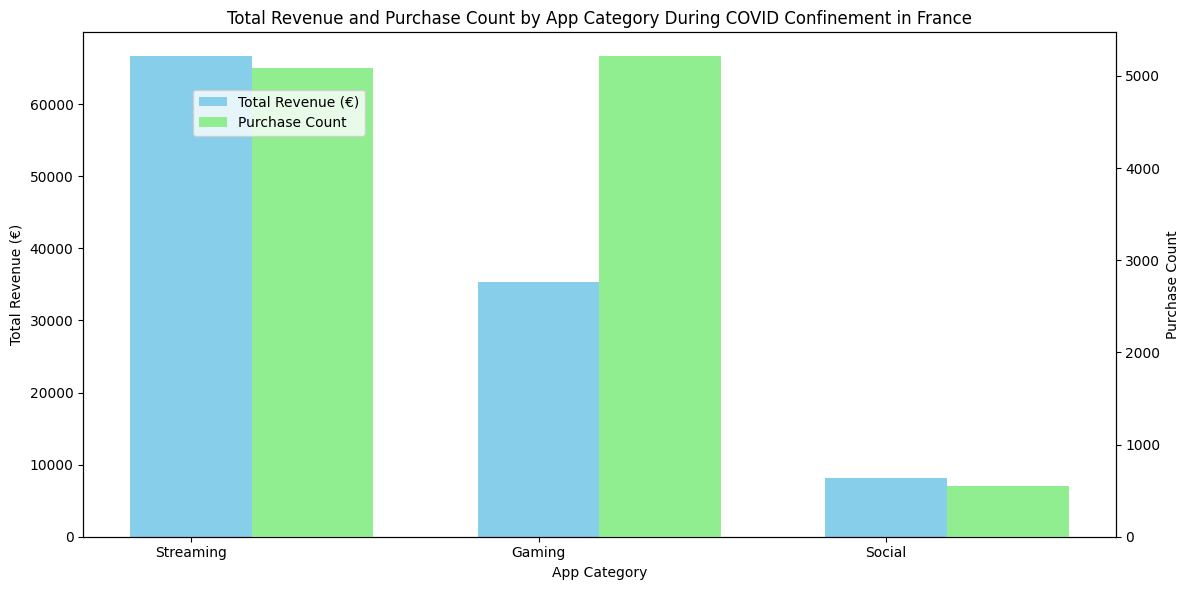

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.35
bar_positions = range(len(category_performance))

#  total revenue 
ax1.bar(bar_positions, category_performance['total_revenue'], width=bar_width, color='skyblue', label='Total Revenue (€)')
ax1.set_xlabel('App Category')
ax1.set_ylabel('Total Revenue (€)')
ax1.set_title('Total Revenue and Purchase Count by App Category During COVID Confinement in France')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(category_performance['category'])
ax1.tick_params(axis='y')

# purchase count
ax2 = ax1.twinx()
ax2.bar([p + bar_width for p in bar_positions], category_performance['purchase_count'], width=bar_width, color='lightgreen', label='Purchase Count')
ax2.set_ylabel('Purchase Count')
ax2.tick_params(axis='y')

fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), bbox_transform=ax1.transAxes)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
covid_period = ('2020-03', '2020-05')

monthly_metrics = data.groupby('year_month').agg(
    total_revenue=pd.NamedAgg(column='order_total_paid', aggfunc='sum'),
    purchase_count=pd.NamedAgg(column='id_order', aggfunc='count')
).reset_index()


monthly_metrics['period'] = monthly_metrics['year_month'].apply(
    lambda x: 'COVID' if covid_period[0] <= x <= covid_period[1] else 'Non-COVID'
)

monthly_metrics


,year_month,total_revenue,purchase_count,period
0,2020-01,14622.54,1509,Non-COVID
1,2020-02,27780.75,2715,Non-COVID
2,2020-03,28790.08,2899,COVID
3,2020-04,46727.50,4018,COVID
4,2020-05,35150.23,3971,COVID
5,2020-06,36428.59,3629,Non-COVID
6,2020-07,41442.74,4190,Non-COVID
7,2020-08,44570.98,4626,Non-COVID
8,2020-09,37677.32,4015,Non-COVID


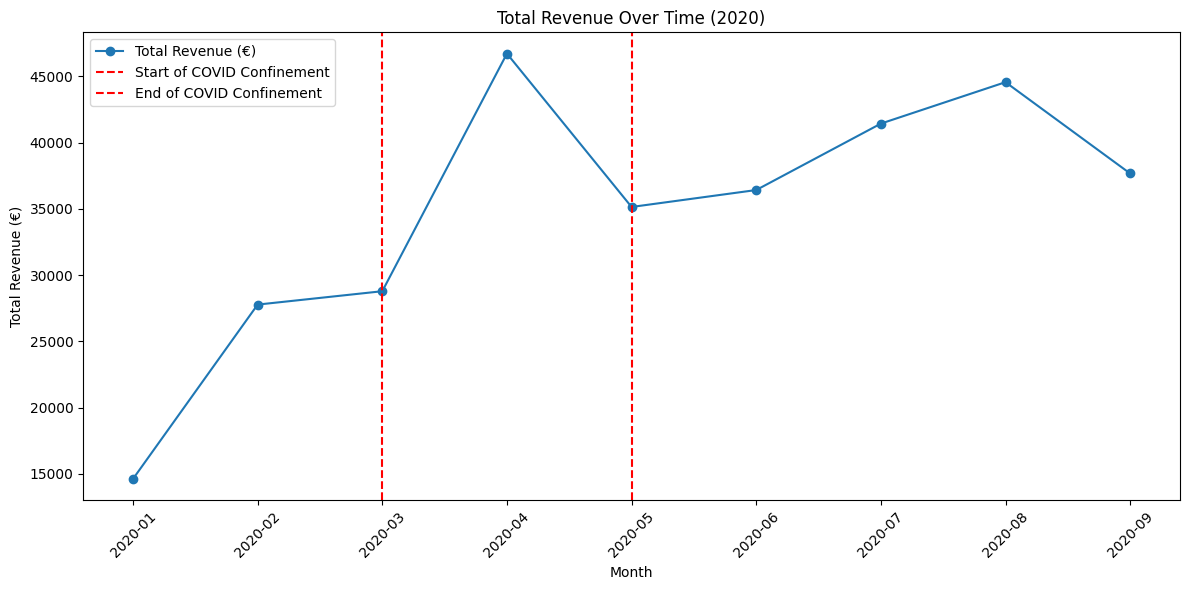

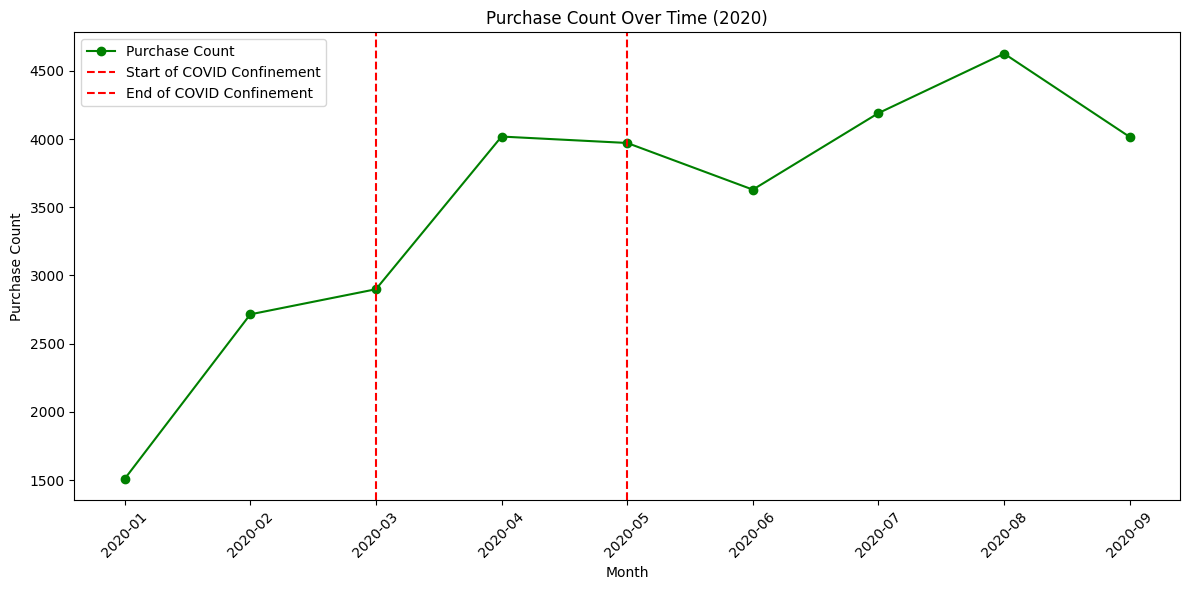

In [8]:
# chart for total revenue over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_metrics['year_month'], monthly_metrics['total_revenue'], marker='o', label='Total Revenue (€)')
plt.axvline(x='2020-03', color='r', linestyle='--', label='Start of COVID Confinement')
plt.axvline(x='2020-05', color='r', linestyle='--', label='End of COVID Confinement')
plt.title('Total Revenue Over Time (2020)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (€)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# chart for purchase count over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_metrics['year_month'], monthly_metrics['purchase_count'], marker='o', color='g', label='Purchase Count')
plt.axvline(x='2020-03', color='r', linestyle='--', label='Start of COVID Confinement')
plt.axvline(x='2020-05', color='r', linestyle='--', label='End of COVID Confinement')
plt.title('Purchase Count Over Time (2020)')
plt.xlabel('Month')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
# Split by Editor

monthly_editor_metrics = data.groupby(['year_month', 'final_editor']).agg(
    total_revenue=pd.NamedAgg(column='order_total_paid', aggfunc='sum'),
    purchase_count=pd.NamedAgg(column='id_order', aggfunc='count')
).reset_index()

monthly_editor_metrics['period'] = monthly_editor_metrics['year_month'].apply(
    lambda x: 'COVID' if covid_period[0] <= x <= covid_period[1] else 'Non-COVID'
)

monthly_editor_metrics.head()


,year_month,final_editor,total_revenue,purchase_count,period
0,2020-01,GROUPE CANAL+,1041.01,56,Non-COVID
1,2020-01,King,578.22,128,Non-COVID
2,2020-01,"Netflix, Inc.",5752.86,470,Non-COVID
3,2020-01,Playrix,221.55,95,Non-COVID
4,2020-01,Supercell,4744.29,621,Non-COVID


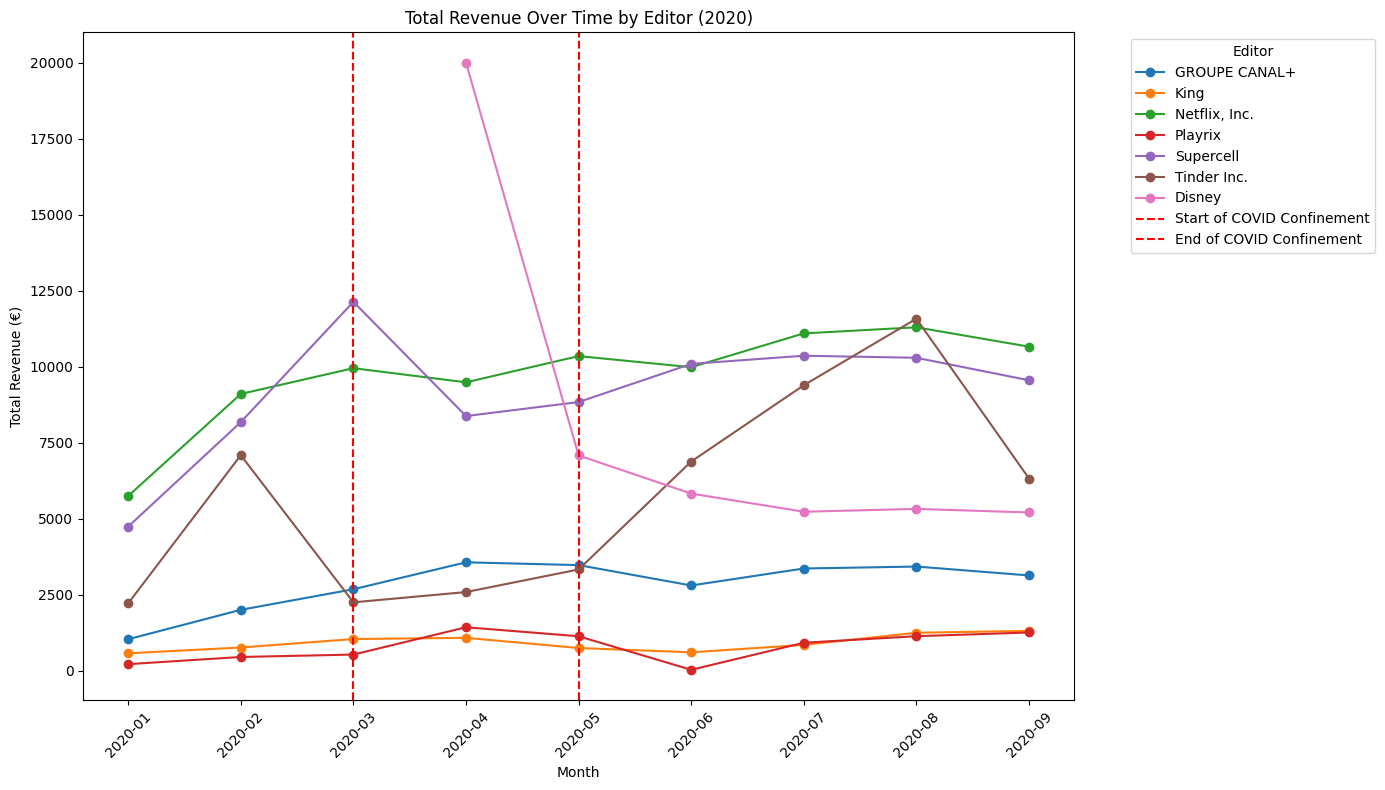

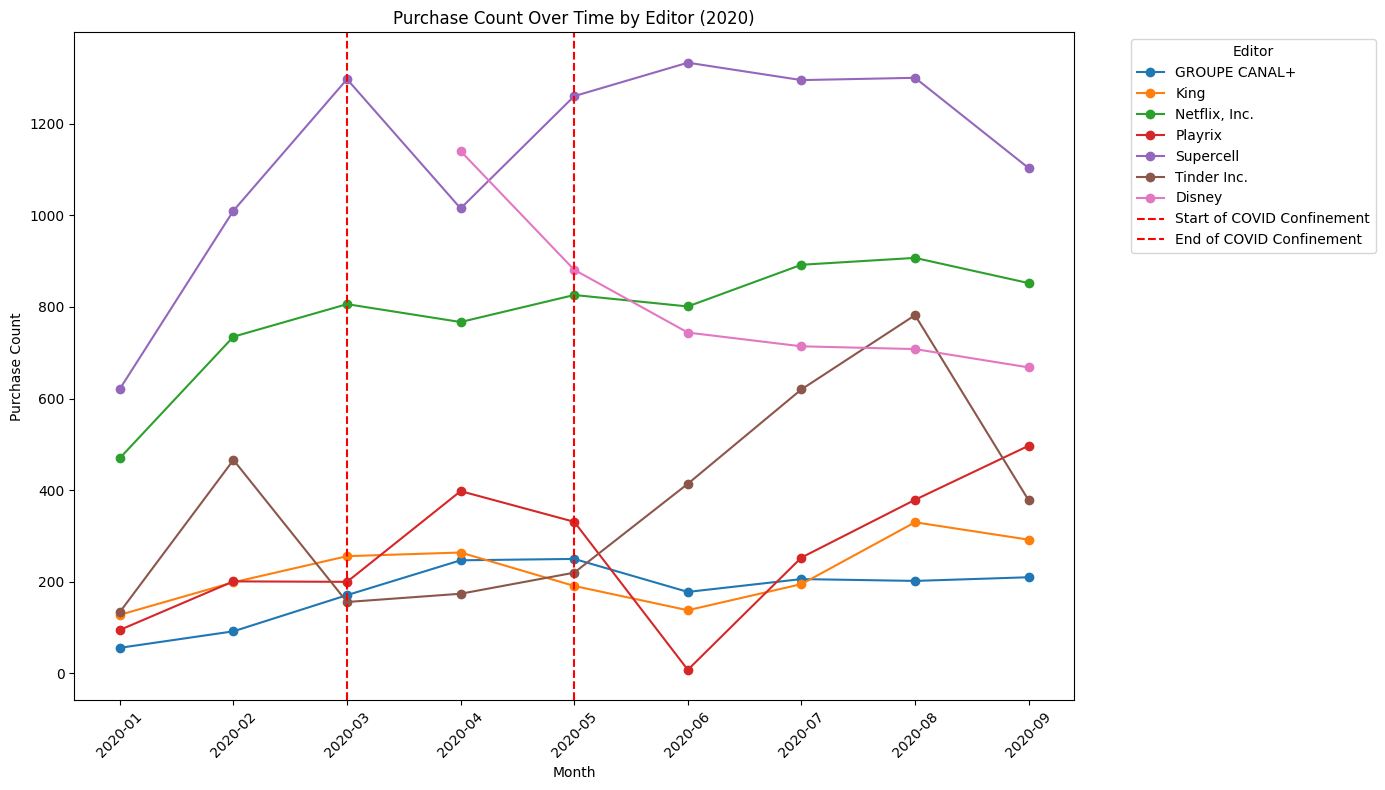

In [10]:
# chart for total revenue over time by editor
plt.figure(figsize=(14, 8))
for editor in monthly_editor_metrics['final_editor'].unique():
    editor_data = monthly_editor_metrics[monthly_editor_metrics['final_editor'] == editor]
    plt.plot(editor_data['year_month'], editor_data['total_revenue'], marker='o', label=editor)

plt.axvline(x='2020-03', color='r', linestyle='--', label='Start of COVID Confinement')
plt.axvline(x='2020-05', color='r', linestyle='--', label='End of COVID Confinement')
plt.title('Total Revenue Over Time by Editor (2020)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (€)')
plt.xticks(rotation=45)
plt.legend(title='Editor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# chart for purchase count over time by editor
plt.figure(figsize=(14, 8))
for editor in monthly_editor_metrics['final_editor'].unique():
    editor_data = monthly_editor_metrics[monthly_editor_metrics['final_editor'] == editor]
    plt.plot(editor_data['year_month'], editor_data['purchase_count'], marker='o', label=editor)

plt.axvline(x='2020-03', color='r', linestyle='--', label='Start of COVID Confinement')
plt.axvline(x='2020-05', color='r', linestyle='--', label='End of COVID Confinement')
plt.title('Purchase Count Over Time by Editor (2020)')
plt.xlabel('Month')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)
plt.legend(title='Editor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [11]:
pre_confinement_period = ('2020-01', '2020-02')
post_confinement_period = ('2020-06', '2020-09')

# filter
pre_confinement_data = monthly_editor_metrics[
    monthly_editor_metrics['year_month'].between(pre_confinement_period[0], pre_confinement_period[1])
]
post_confinement_data = monthly_editor_metrics[
    monthly_editor_metrics['year_month'].between(post_confinement_period[0], post_confinement_period[1])
]

# Avg monthly metrics for each editor in pre- & post-confinement periods
pre_confinement_avg = pre_confinement_data.groupby('final_editor').agg(
    avg_revenue_pre=pd.NamedAgg(column='total_revenue', aggfunc='mean'),
    avg_purchase_count_pre=pd.NamedAgg(column='purchase_count', aggfunc='mean')
).reset_index()

post_confinement_avg = post_confinement_data.groupby('final_editor').agg(
    avg_revenue_post=pd.NamedAgg(column='total_revenue', aggfunc='mean'),
    avg_purchase_count_post=pd.NamedAgg(column='purchase_count', aggfunc='mean')
).reset_index()

# Merge 
comparison_df = pre_confinement_avg.merge(post_confinement_avg, on='final_editor')

# & changes between pre- & post-confinement periods
comparison_df['revenue_change'] = ((comparison_df['avg_revenue_post'] - comparison_df['avg_revenue_pre']) /
                                   comparison_df['avg_revenue_pre']) * 100
comparison_df['purchase_count_change'] = ((comparison_df['avg_purchase_count_post'] - comparison_df['avg_purchase_count_pre']) /
                                          comparison_df['avg_purchase_count_pre']) * 100

comparison_df


,final_editor,avg_revenue_pre,avg_purchase_count_pre,avg_revenue_post,avg_purchase_count_post,revenue_change,purchase_count_change
0,GROUPE CANAL+,1524.615,74.0,3186.4700,199.00,109.001617,168.918919
1,King,673.615,163.5,1009.3125,238.75,49.835217,46.024465
2,"Netflix, Inc.",7429.995,602.5,10761.7125,863.00,44.841450,43.236515
3,Playrix,339.370,148.0,841.0125,284.25,147.815806,92.060811
4,Supercell,6462.595,815.5,10078.5225,1257.75,55.951634,54.230533
5,Tinder Inc.,4657.540,300.0,8546.6550,548.50,83.501484,82.833333


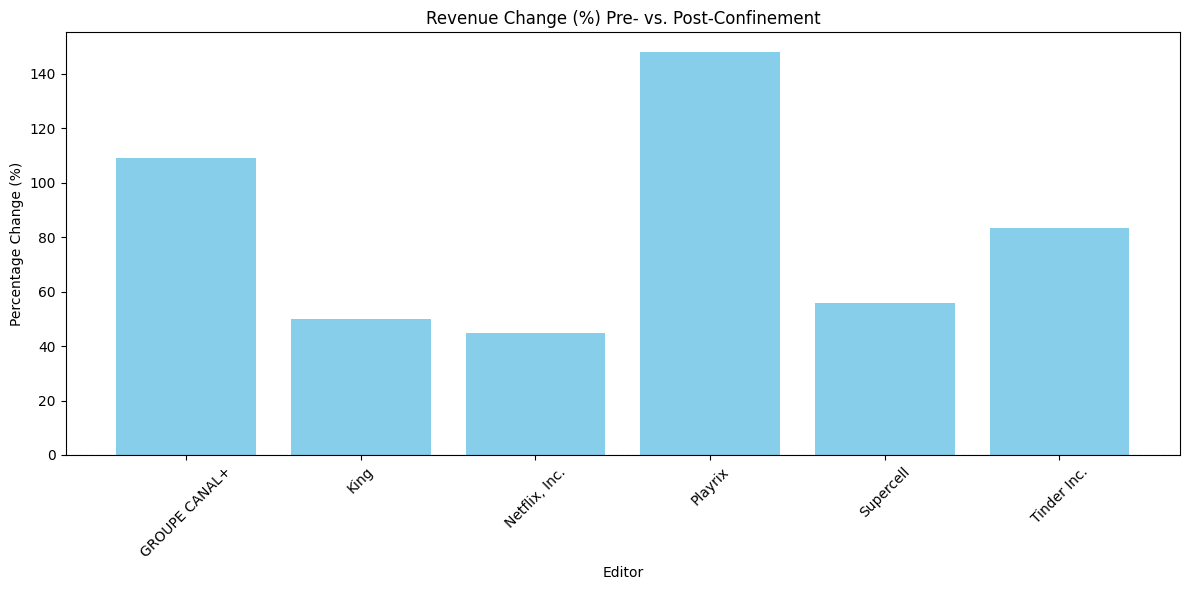

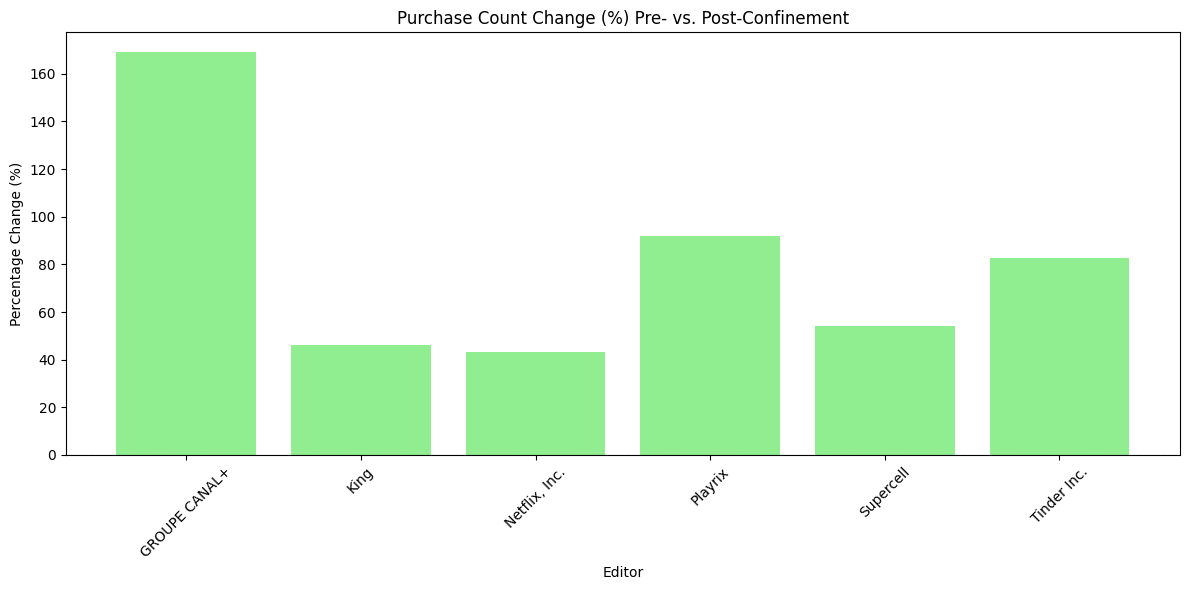

In [12]:
# Viz Pre- and Post-Confinement 

# revenue changes by editor
plt.figure(figsize=(12, 6))
plt.bar(comparison_df['final_editor'], comparison_df['revenue_change'], color='skyblue', label='Revenue Change (%)')
plt.title('Revenue Change (%) Pre- vs. Post-Confinement')
plt.xlabel('Editor')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

# purchase count changes by editor
plt.figure(figsize=(12, 6))
plt.bar(comparison_df['final_editor'], comparison_df['purchase_count_change'], color='lightgreen', label='Purchase Count Change (%)')
plt.title('Purchase Count Change (%) Pre- vs. Post-Confinement')
plt.xlabel('Editor')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()
